In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset
df = pd.read_csv("shopping_trends.csv")
df

,Age,Gender,Item Purchased,Category,Location,Season,Review Rating,Discount Applied,Promo Code Used,Previous Purchases,Frequency of Purchases,Purchase Intent Category
0,33,Male,Backpack,Accessories,Malaysia,Summer,4.5,Yes,Yes,44,0.25,Wants-based
1,39,Female,Jeans,Clothing,Spain,Winter,5.0,No,No,23,1.00,Wants-based
2,23,Male,Dress,Clothing,Australia,Spring,3.2,No,No,30,NaN,Wants-based
3,39,Male,Backpack,Accessories,United Kingdom,Fall,3.1,Yes,Yes,19,4.00,Wants-based
4,34,Female,Gloves,Accessories,Nigeria,Winter,2.8,No,No,16,NaN,Wants-based
...,...,...,...,...,...,...,...,...,...,...,...,...
12939,53,Male,Sneakers,Footwear,Canada,Fall,4.4,Yes,Yes,1,2.00,Impulsive
12940,54,Male,Jewelry,Accessories,Thailand,Summer,4.3,Yes,Yes,1,1.00,Impulsive
12941,56,Female,Boots,Footwear,United States,Summer,3.8,No,No,2,0.25,Impulsive
12942,52,Female,Coat,Outerwear,Spain,Spring,3.0,No,No,2,1.00,Impulsive


In [97]:
#check missing values
print("\nMising Value:\n",df.isnull().sum())

#check datatype for each columns
print("\nDatatype for each column\n",df.dtypes)

#check duplicate values
df.duplicated().sum()


Mising Value:
 Age                            0
Gender                         0
Item Purchased                 0
Category                       0
Location                       0
Season                         0
Review Rating                  0
Discount Applied               0
Promo Code Used                0
Previous Purchases             0
Frequency of Purchases      1131
Purchase Intent Category       0
dtype: int64

Datatype for each column
 Age                           int64
Gender                       object
Item Purchased               object
Category                     object
Location                     object
Season                       object
Review Rating               float64
Discount Applied             object
Promo Code Used              object
Previous Purchases            int64
Frequency of Purchases      float64
Purchase Intent Category     object
dtype: object


np.int64(2228)

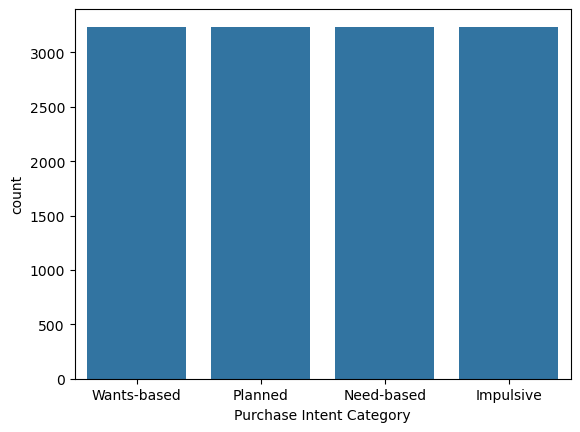

In [98]:
sns.countplot(x="Purchase Intent Category", data=df) # checking whether value realistic or not
plt.show()

In [99]:
# dropping duplicate values
df.drop_duplicates(inplace=True)
df

,Age,Gender,Item Purchased,Category,Location,Season,Review Rating,Discount Applied,Promo Code Used,Previous Purchases,Frequency of Purchases,Purchase Intent Category
0,33,Male,Backpack,Accessories,Malaysia,Summer,4.5,Yes,Yes,44,0.25,Wants-based
1,39,Female,Jeans,Clothing,Spain,Winter,5.0,No,No,23,1.00,Wants-based
2,23,Male,Dress,Clothing,Australia,Spring,3.2,No,No,30,NaN,Wants-based
3,39,Male,Backpack,Accessories,United Kingdom,Fall,3.1,Yes,Yes,19,4.00,Wants-based
4,34,Female,Gloves,Accessories,Nigeria,Winter,2.8,No,No,16,NaN,Wants-based
...,...,...,...,...,...,...,...,...,...,...,...,...
12932,70,Male,Socks,Clothing,Kenya,Summer,3.5,Yes,Yes,2,1.00,Impulsive
12935,63,Female,Sweater,Clothing,Vietnam,Spring,2.3,No,No,2,4.00,Impulsive
12937,25,Female,Boots,Footwear,Kenya,Summer,3.9,No,No,3,2.00,Impulsive
12940,54,Male,Jewelry,Accessories,Thailand,Summer,4.3,Yes,Yes,1,1.00,Impulsive


In [100]:
from sklearn.preprocessing import LabelEncoder

cleaned_df = df.copy()

# Handle missing values
cleaned_df['Frequency of Purchases'] = cleaned_df['Frequency of Purchases'].fillna(cleaned_df['Frequency of Purchases'].mode()[0])

# Convert categorical variables to numerical format using label encoding
categorical_cols = ['Gender', 'Item Purchased', 'Category', 'Location', 'Season', 'Discount Applied', 
                    'Promo Code Used', 'Purchase Intent Category']
le_dict = {}  # Store label encoders

for column in categorical_cols:
    le = LabelEncoder()
    cleaned_df[column] = le.fit_transform(cleaned_df[column])
    le_dict[column] = le

cleaned_df.head()

#check missing values
print("\nMising Value:\n",cleaned_df.isnull().sum())

#check datatype for each columns
print("\nDatatype for each column\n",cleaned_df.dtypes)


Mising Value:
 Age                         0
Gender                      0
Item Purchased              0
Category                    0
Location                    0
Season                      0
Review Rating               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Frequency of Purchases      0
Purchase Intent Category    0
dtype: int64

Datatype for each column
 Age                           int64
Gender                        int64
Item Purchased                int64
Category                      int64
Location                      int64
Season                        int64
Review Rating               float64
Discount Applied              int64
Promo Code Used               int64
Previous Purchases            int64
Frequency of Purchases      float64
Purchase Intent Category      int64
dtype: object


In [101]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Define features and target variable
feature_df = cleaned_df[['Gender', 'Item Purchased', 'Category', 'Location', 'Season', 'Discount Applied', 
                         'Promo Code Used']]

x = np.asarray(feature_df)
y = np.asarray(cleaned_df['Purchase Intent Category'])  # Target

# Split dataset into 80% training and 20% testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4, stratify=y)  # Stratify to balance classes

# Scale features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train) # type: ignore


### Linear SVM

In [102]:
# Create an SVM model with
clf = SVC(kernel='linear', C=1)

# Train the model
SvmModel = clf.fit(x_train_scaled, y_train)

# Test the model
y_pred = clf.predict(x_test_scaled)

# Evaluate model performance
svm_accuracy = accuracy_score(y_test, y_pred)
svm_precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
svm_recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
svm_f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

print("SVM Model Performance:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1-score:", svm_f1)

SVM Model Performance:
Accuracy: 0.30223880597014924
Precision: 0.7891094898641122
Recall: 0.30223880597014924
F1-score: 0.1402942308514733


### XGBoost

In [103]:
# Train XGBoost classifier
xgb_clf = XGBClassifier(eval_metric='mlogloss')
xgb_clf.fit(x_train_scaled, y_train)

# Predict on test data
y_pred = xgb_clf.predict(x_test_scaled)

# Evaluate model performance
xgboost_accuracy = accuracy_score(y_test, y_pred)
xgboost_precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
xgboost_recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
xgboost_f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

print("XGBoost Model Performance:")
print("Accuracy:", xgboost_accuracy)
print("Precision:", xgboost_precision)
print("Recall:", xgboost_recall)
print("F1-score:", xgboost_f1)

XGBoost Model Performance:
Accuracy: 0.8675373134328358
Precision: 0.8770520244272149
Recall: 0.8675373134328358
F1-score: 0.8638597663382134


### Decision Tree

In [104]:
# Train Decision Tree model
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, class_weight="balanced", random_state=42)
DecisionTreeModel = clf.fit(x_train_scaled, y_train)

# Test the model
y_pred = clf.predict(x_test_scaled)

# Evaluate model performance
dt_accuracy = accuracy_score(y_test, y_pred)
dt_precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
dt_recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
dt_f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

print("Decision Tree Model Performance:")
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1-score:", dt_f1)

Decision Tree Model Performance:
Accuracy: 0.34421641791044777
Precision: 0.35689206101685517
Recall: 0.34421641791044777
F1-score: 0.30236747250685564


### Logistic Regression

In [105]:
# Train Logistic Regression model
logreg = LogisticRegression(class_weight='balanced', max_iter=1000)
logreg.fit(x_train_balanced, y_train_balanced)

# Test
y_pred = logreg.predict(x_test_scaled)

# Evaluate model performance
lr_accuracy = accuracy_score(y_test, y_pred)
lr_precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
lr_recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
lr_f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

print("Logistic Regression Model Performance:")
print("Accuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1-score:", lr_f1)

Logistic Regression Model Performance:
Accuracy: 0.24253731343283583
Precision: 0.32354327344406036
Recall: 0.24253731343283583
F1-score: 0.19964622435505375


### Random Forest

In [106]:
# Train Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=8, class_weight='balanced', random_state=42)
rf_clf.fit(x_train_scaled, y_train)

# Predict on test data
y_pred = rf_clf.predict(x_test_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

# Evaluate model performance
rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
rf_recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
rf_f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

print("Random Forest Model Performance:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-score:", rf_f1)

Random Forest Model Performance:
Accuracy: 0.7196828358208955
Precision: 0.7479644541228133
Recall: 0.7196828358208955
F1-score: 0.7081097357370152



#### Hyperparameter Tuning Testing

In [107]:
from sklearn.model_selection import GridSearchCV

model = SVC()
param_grid = {
    'C': [0.1, 1, 10],  # Example: regularization parameter
    'kernel': ['linear', 'rbf'],  # Example: kernel type
    'gamma': ['scale', 'auto'] # Example: kernel coefficient for 'rbf'
}

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')  # cv=3 for 3-fold cross-validation
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# 5. Evaluate the best model on the test set
best_model = grid_search.best_estimator_  # Get the model with best hyperparameters
svmtuning_accuracy = best_model.score(x_test, y_test)  # Evaluate on the test set
svmtuning_precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
svmtuning_recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
svmtuning_f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

print("Accuracy:", svmtuning_accuracy)
print("Precision:", svmtuning_precision)
print("Recall:", svmtuning_recall)
print("F1-score:", svmtuning_f1)


Exception ignored in: <function ResourceTracker.__del__ at 0x104bd9b20>
Traceback (most recent call last):
  File "/Users/farahfuaad/anaconda3/envs/myenv/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/Users/farahfuaad/anaconda3/envs/myenv/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/Users/farahfuaad/anaconda3/envs/myenv/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x104ec9b20>
Traceback (most recent call last):
  File "/Users/farahfuaad/anaconda3/envs/myenv/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/Users/farahfuaad/anaconda3/envs/myenv/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/Users/farahfuaad/anaconda3/envs/myenv/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
ChildProc

Best Hyperparameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Accuracy: 0.8526119402985075
Precision: 0.7479644541228133
Recall: 0.7196828358208955
F1-score: 0.7081097357370152


In [108]:
from sklearn.linear_model import LogisticRegression

# Define parameter grid for Logistic Regression with higher max_iter
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear'],
    'class_weight': ['balanced', None],
    'max_iter': [1000, 2000, 3000] 
}

lr = LogisticRegression()
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=3, scoring='accuracy')
grid_search_lr.fit(x_train, y_train)  # Use scaled data

# Best hyperparameters
best_params_lr = grid_search_lr.best_params_
print("Best Hyperparameters for Logistic Regression:", best_params_lr)

# Evaluate on test set
best_lr = grid_search_lr.best_estimator_
lrtuning_accuracy = best_lr.score(x_test, y_test)  # Use scaled data
y_pred_lr = best_lr.predict(x_test)
lrtuning_precision = precision_score(y_test, y_pred_lr, average='weighted', zero_division=1)
lrtuning_recall = recall_score(y_test, y_pred_lr, average='weighted', zero_division=1)
lrtuning_f1 = f1_score(y_test, y_pred_lr, average='weighted', zero_division=1)

print("Logistic Regression Model Performance (with tuning):")
print("Accuracy:", lrtuning_accuracy)
print("Precision:", lrtuning_precision)
print("Recall:", lrtuning_recall)
print("F1-score:", lrtuning_f1)

Best Hyperparameters for Logistic Regression: {'C': 10, 'class_weight': None, 'max_iter': 1000, 'solver': 'liblinear'}
Logistic Regression Model Performance (with tuning):
Accuracy: 0.2905783582089552
Precision: 0.26919703238294107
Recall: 0.2905783582089552
F1-score: 0.22783438253557398


In [109]:
# Hyperparameter tuning for XGBoost using GridSearchCV
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb = XGBClassifier(eval_metric='mlogloss')
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_xgb.fit(x_train_scaled, y_train)

# Best hyperparameters
best_params_xgb = grid_search_xgb.best_params_
print("Best Hyperparameters for XGBoost:", best_params_xgb)

# Evaluate on test set
best_xgb = grid_search_xgb.best_estimator_
xgt_accuracy = best_xgb.score(x_test_scaled, y_test)
y_pred_xgb = best_xgb.predict(x_test_scaled)
xgt_precision = precision_score(y_test, y_pred_xgb, average='weighted', zero_division=1)
xgt_recall = recall_score(y_test, y_pred_xgb, average='weighted', zero_division=1)
xgt_f1 = f1_score(y_test, y_pred_xgb, average='weighted', zero_division=1)

print("XGBoost Model Performance (with tuning):")
print("Accuracy:", xgt_accuracy)
print("Precision:", xgt_precision)
print("Recall:", xgt_recall)
print("F1-score:", xgt_f1)

Best Hyperparameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
XGBoost Model Performance (with tuning):
Accuracy: 0.9020522388059702
Precision: 0.9101457362838428
Recall: 0.9020522388059702
F1-score: 0.9004769968025064


#### Results

In [110]:
import pandas as pd

# Collect model performance metrics from previous cells
model_names = ["Linear SVM", "XGBoost", "Decision Tree", "Logistic Regression", "Random Forest",    
               best_params['kernel'].capitalize() + " SVM with Tuning", "Logistic Regression with Tuning", "XGBoost with Tuning"]
accuracies = []
precisions = []
recalls = []
f1_scores = []

# SVM metrics
accuracies.append(svm_accuracy)
precisions.append(svm_precision)
recalls.append(svm_recall)
f1_scores.append(svm_f1)

# XGBoost metrics
accuracies.append(xgboost_accuracy)
precisions.append(xgboost_precision)
recalls.append(xgboost_recall)
f1_scores.append(xgboost_f1)

# Decision Tree
accuracies.append(dt_accuracy)
precisions.append(dt_precision)
recalls.append(dt_recall)
f1_scores.append(dt_f1)

# Logistic Regression
accuracies.append(lr_accuracy)
precisions.append(lr_precision)
recalls.append(lr_recall)
f1_scores.append(lr_f1)

# Random Forest
accuracies.append(rf_accuracy)
precisions.append(rf_precision)
recalls.append(rf_recall)
f1_scores.append(rf_f1)

# SVM with Hyperparameter Tuning
accuracies.append(svmtuning_accuracy)
precisions.append(svmtuning_precision)
recalls.append(svmtuning_recall)
f1_scores.append(svmtuning_f1)

# Logistic Regression with Hyperparameter Tuning
accuracies.append(lrtuning_accuracy)
precisions.append(lrtuning_precision)
recalls.append(lrtuning_recall)
f1_scores.append(lrtuning_f1)

# XGBoost with Hyperparameter Tuning
accuracies.append(xgt_accuracy)
precisions.append(xgt_precision)
recalls.append(xgt_recall)
f1_scores.append(xgt_f1)


# Create DataFrame
performance_df = pd.DataFrame({
    "Model": model_names,
    "Accuracy": accuracies,
    "Precision": precisions,
    "Recall": recalls,
    "F1-score": f1_scores
})

performance_df

,Model,Accuracy,Precision,Recall,F1-score
0,Linear SVM,0.302239,0.789109,0.302239,0.140294
1,XGBoost,0.867537,0.877052,0.867537,0.863860
2,Decision Tree,0.344216,0.356892,0.344216,0.302367
3,Logistic Regression,0.242537,0.323543,0.242537,0.199646
4,Random Forest,0.719683,0.747964,0.719683,0.708110
5,Rbf SVM with Tuning,0.852612,0.747964,0.719683,0.708110
6,Logistic Regression with Tuning,0.290578,0.269197,0.290578,0.227834
7,XGBoost with Tuning,0.902052,0.910146,0.902052,0.900477


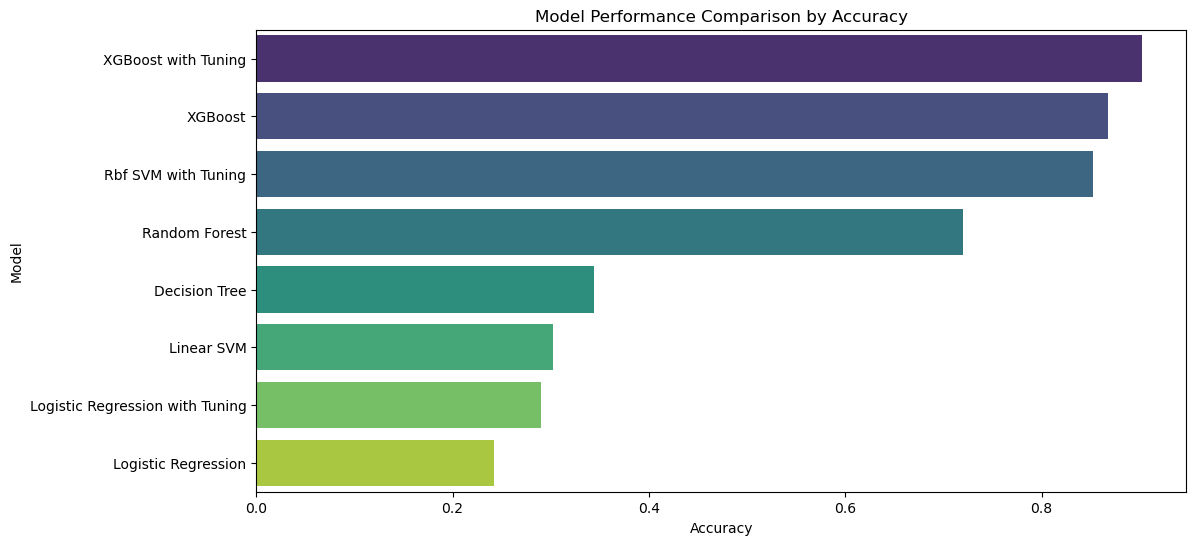

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort by Accuracy in ascending order
sorted_df = performance_df.sort_values(by="Accuracy", ascending=False)

plt.figure(figsize=(12, 6))
plt.title("Model Performance Comparison by Accuracy")
sns.barplot(x="Accuracy", y="Model", data=sorted_df, hue="Model", palette="viridis", legend=False)
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.show()

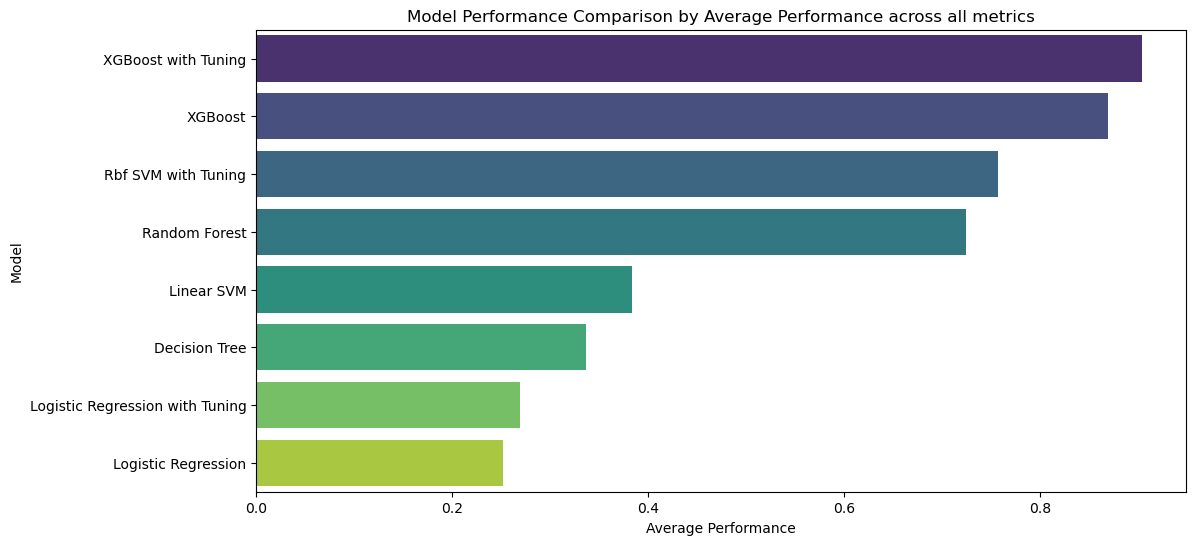

In [112]:
# Calculate average performance across all metrics
performance_df['Avg_Performance'] = performance_df[['Accuracy', 'Precision', 'Recall', 'F1-score']].mean(axis=1)

# Sort by average performance
sorted_df = performance_df.sort_values(by="Avg_Performance", ascending=False)

plt.figure(figsize=(12, 6))
plt.title("Model Performance Comparison by Average Performance across all metrics")
sns.barplot(x="Avg_Performance", y="Model", data=sorted_df, hue="Model", palette="viridis", legend=False)
plt.xlabel("Average Performance")
plt.ylabel("Model")
plt.show()

<Figure size 600x400 with 0 Axes>

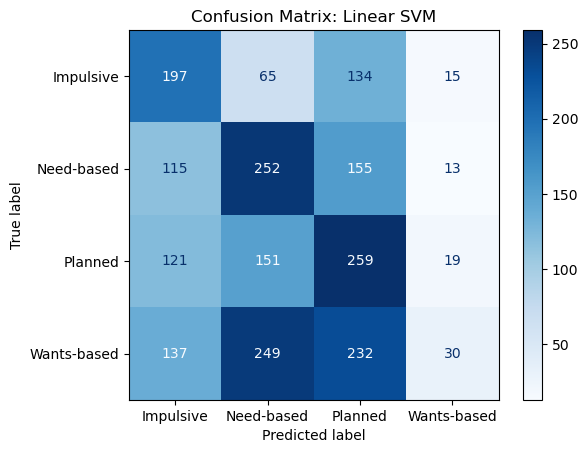

<Figure size 600x400 with 0 Axes>

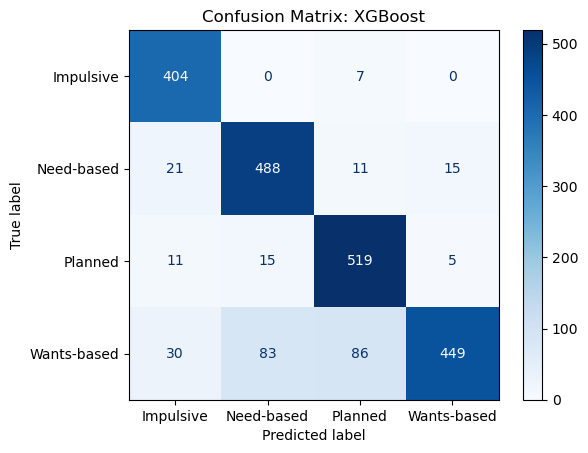

<Figure size 600x400 with 0 Axes>

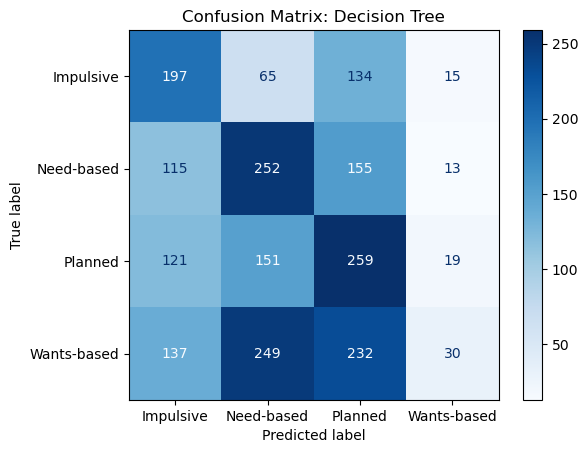

<Figure size 600x400 with 0 Axes>

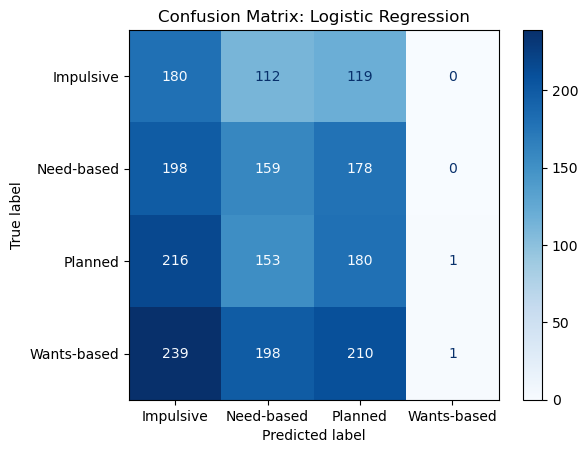

<Figure size 600x400 with 0 Axes>

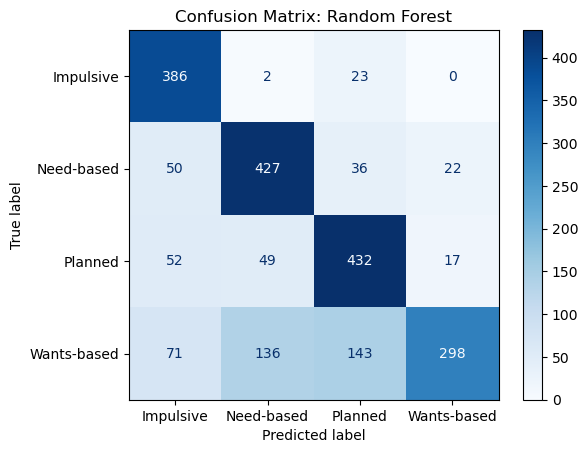

<Figure size 600x400 with 0 Axes>

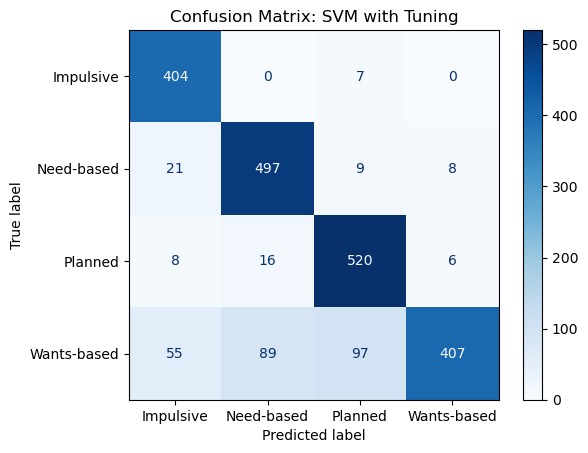

<Figure size 600x400 with 0 Axes>

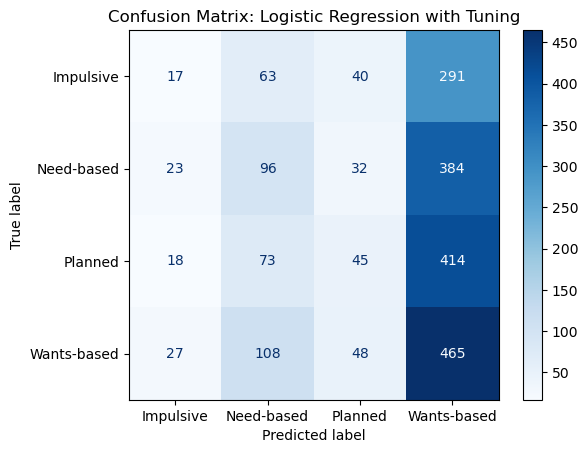

<Figure size 600x400 with 0 Axes>

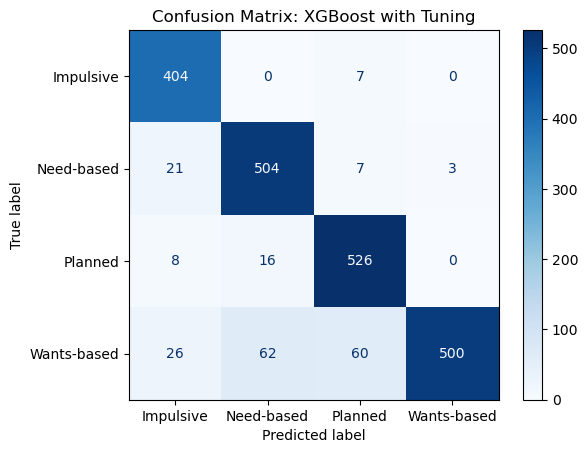

In [113]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Prepare a dictionary of model names and their predictions
model_predictions = {
    "Linear SVM": clf.predict(x_test_scaled),
    "XGBoost": xgb_clf.predict(x_test_scaled),
    "Decision Tree": DecisionTreeModel.predict(x_test_scaled),
    "Logistic Regression": logreg.predict(x_test_scaled),
    "Random Forest": rf_clf.predict(x_test_scaled),
    "SVM with Tuning": best_model.predict(x_test),
    "Logistic Regression with Tuning": best_lr.predict(x_test),
    "XGBoost with Tuning": best_xgb.predict(x_test_scaled)
}

# Get class labels from the label encoder for purchase_intent_category
class_labels = le_dict['Purchase Intent Category'].classes_

# Plot confusion matrix for each model
for model_name, y_pred in model_predictions.items():
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    plt.figure(figsize=(6, 4))
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.show()